<a href="https://colab.research.google.com/github/Antoniopf1/SUBJECT-statistical_analysis/blob/main/DEMO_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time series ARIMA com machine learning**

Autor: Antonio Piratelli Filho

Data: 15/09/2025

In [1]:
!pip -q install yfinance

In [2]:
# carregar bibliotecas
import pandas as pd
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import yfinance as yf

In [5]:
# Configurar parametros dos gráficos
from pylab import rcParams
rcParams['figure.figsize'] = 17 ,11

In [6]:
# Carregando dados de Yahoo finance
its4 = yf.Ticker("ITUB4.SA")
hist = its4.history(start="2010-01-01" , end = "2019-12-12")
# Atribuindo dados a dataframe
df = hist
# Mostra dados
df.head() , print(len(df))

2469


(                               Open      High       Low     Close    Volume  \
 Date                                                                          
 2010-01-04 00:00:00-02:00  8.607634  8.961767  8.607634  8.879873  13027737   
 2010-01-05 00:00:00-02:00  8.902006  8.937420  8.831179  8.937420   9452646   
 2010-01-06 00:00:00-02:00  8.908643  8.961763  8.786910  8.859950  11662830   
 2010-01-07 00:00:00-02:00  8.797974  8.864374  8.753708  8.769200  10963224   
 2010-01-08 00:00:00-02:00  8.804616  8.804616  8.614270  8.636403  10723580   
 
                            Dividends  Stock Splits  
 Date                                                
 2010-01-04 00:00:00-02:00   0.078484           0.0  
 2010-01-05 00:00:00-02:00   0.000000           0.0  
 2010-01-06 00:00:00-02:00   0.000000           0.0  
 2010-01-07 00:00:00-02:00   0.000000           0.0  
 2010-01-08 00:00:00-02:00   0.000000           0.0  ,
 None)

In [7]:
# Selecionar colunas e mostrar
df = df.iloc[: ,3:4]
df

,Close
Date,
2010-01-04 00:00:00-02:00,8.879873
2010-01-05 00:00:00-02:00,8.937420
2010-01-06 00:00:00-02:00,8.859950
2010-01-07 00:00:00-02:00,8.769200
2010-01-08 00:00:00-02:00,8.636403
...,...
2019-12-05 00:00:00-03:00,24.883621
2019-12-06 00:00:00-03:00,24.433798
2019-12-09 00:00:00-03:00,24.910889


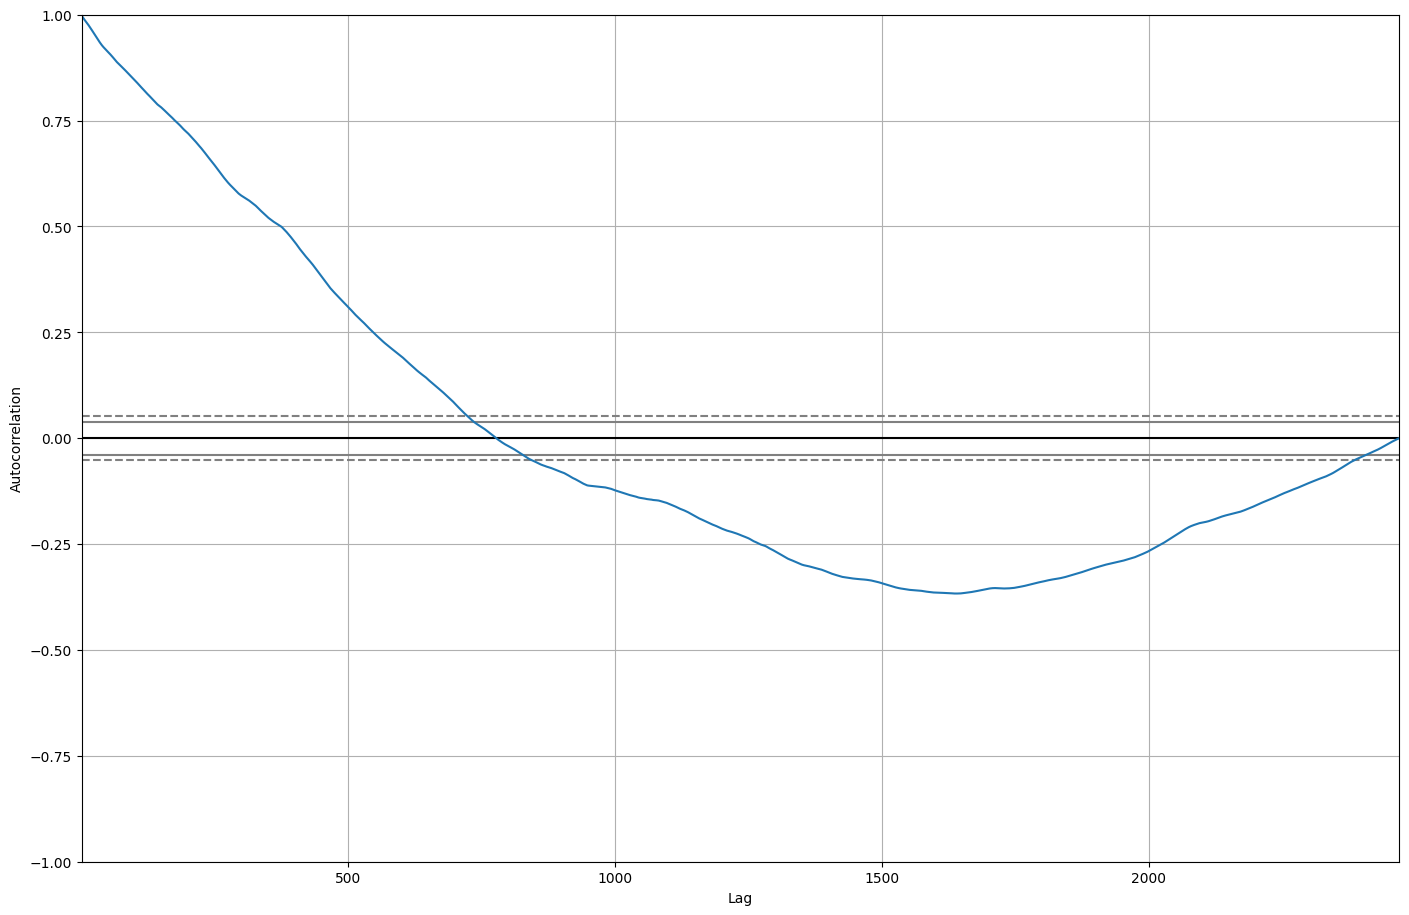

In [8]:
# Grafico de autocorrelacao
autocorrelation_plot(df)
pyplot.show()

In [10]:
# Importando outras bibliotecas
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

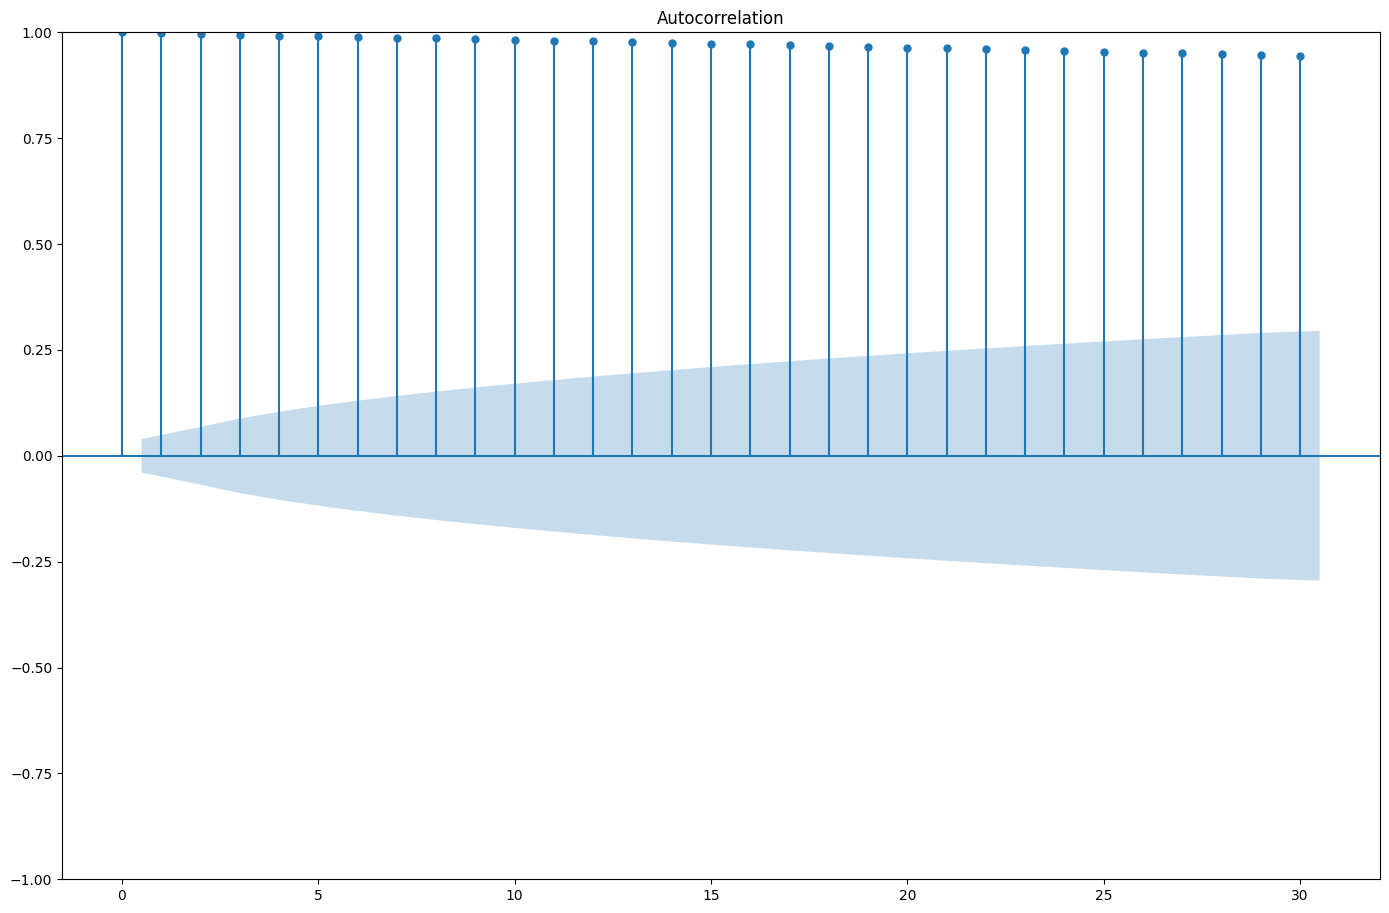

In [15]:
plot_acf( df , lags=30)
pyplot.show()

In [16]:
# Dividindo dados em TREINO E TESTE
size =  2100
#print(metade)
training_data = df[: size]
testing_data = df[ size:]
df.shape, training_data.shape , testing_data.shape

((2469, 1), (2100, 1), (369, 1))

In [17]:
# carregar função ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [19]:
# Ajustar modelo ARIMA(p,d,q) aos dados TREINO
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA( training_data , order=(3,1,1))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
# Ajustando modelo ARIMA
model_fit = model.fit()
# Resultados
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2100
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 271.103
Date:                Mon, 15 Sep 2025   AIC                           -532.206
Time:                        16:58:49   BIC                           -503.960
Sample:                             0   HQIC                          -521.860
                               - 2100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1409      0.257     -0.548      0.583      -0.644       0.363
ar.L2         -0.0154      0.017     -0.924      0.356      -0.048       0.017
ar.L3         -0.0695      0.018     -3.768      0.0

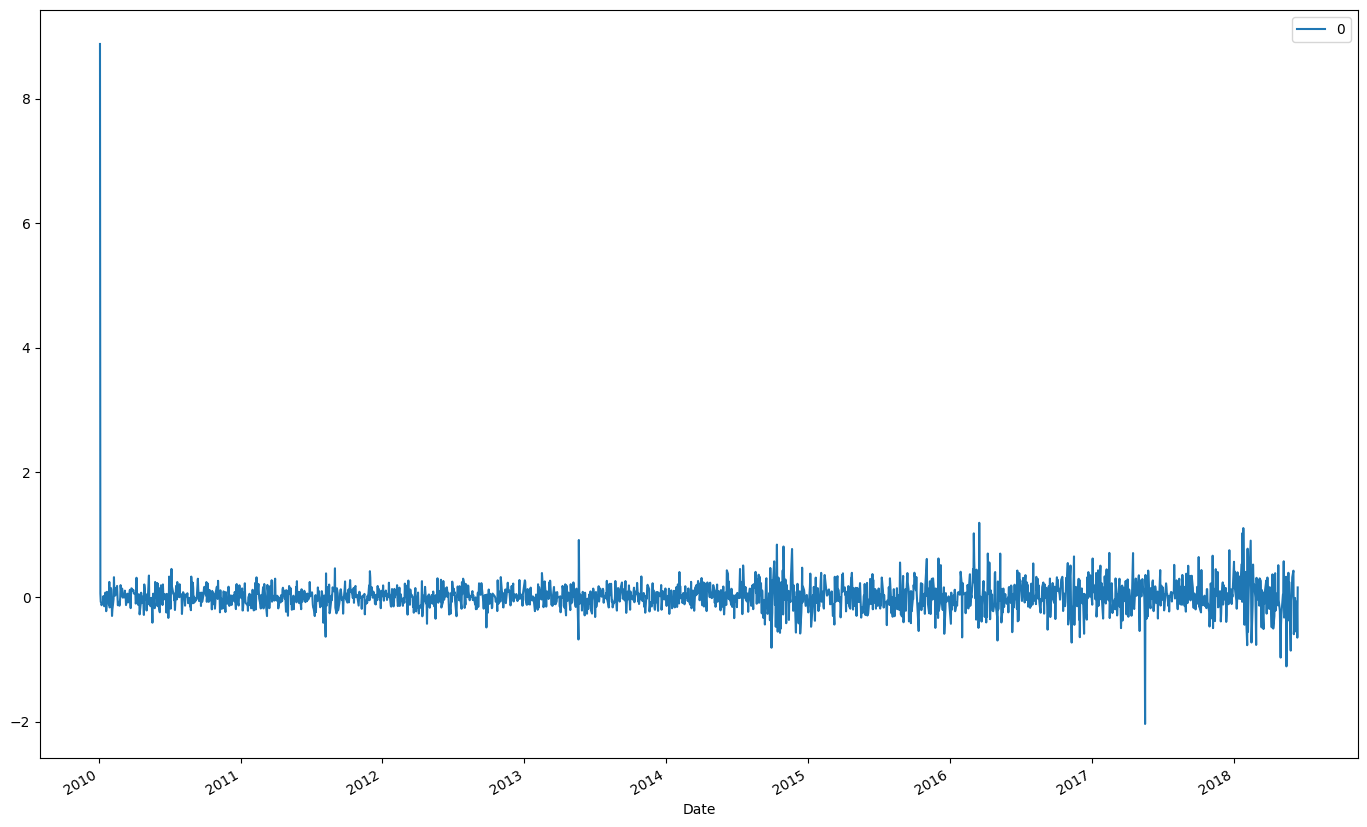

In [23]:
# Gráfico de residuos
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

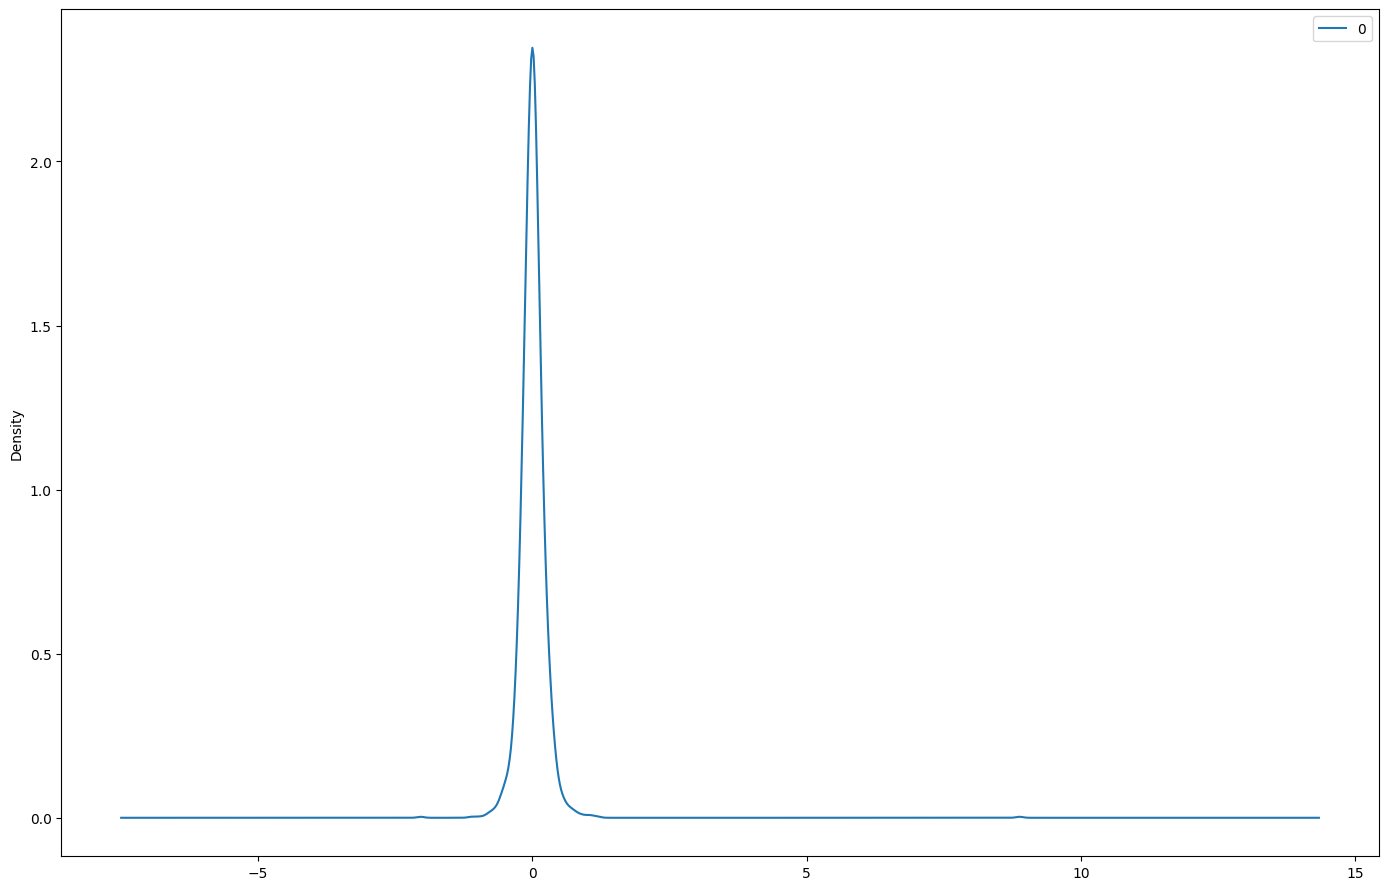

In [24]:
# gráficos de densidade dos residuais
residuals.plot(kind='kde')
pyplot.show()

In [25]:
# estatística descritiva dos residuos
print(residuals.describe())

                 0
count  2100.000000
mean      0.008362
std       0.287606
min      -2.037609
25%      -0.105870
50%       0.004827
75%       0.111626
max       8.879873


In [27]:
#salvando o index das datas
datas = []
index = df.index
print(index[3 :])

DatetimeIndex(['2010-01-07 00:00:00-02:00', '2010-01-08 00:00:00-02:00',
               '2010-01-11 00:00:00-02:00', '2010-01-12 00:00:00-02:00',
               '2010-01-13 00:00:00-02:00', '2010-01-14 00:00:00-02:00',
               '2010-01-15 00:00:00-02:00', '2010-01-18 00:00:00-02:00',
               '2010-01-19 00:00:00-02:00', '2010-01-20 00:00:00-02:00',
               ...
               '2019-11-28 00:00:00-03:00', '2019-11-29 00:00:00-03:00',
               '2019-12-02 00:00:00-03:00', '2019-12-03 00:00:00-03:00',
               '2019-12-04 00:00:00-03:00', '2019-12-05 00:00:00-03:00',
               '2019-12-06 00:00:00-03:00', '2019-12-09 00:00:00-03:00',
               '2019-12-10 00:00:00-03:00', '2019-12-11 00:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', name='Date', length=2466, freq=None)


In [28]:
# a variável X recebe os dados da série
X = df.values
X = X.astype('float32')

In [29]:
# Separa os dados com 50% dos dados para treino e 50% dos dados para teste
size = 2100 #int(len(X) * 0.50)

In [30]:
train = X[:size] #train = X[0:size]
test =  X[size:] #test =  X[size:]

In [31]:
# cria a variável history         --RESET PARA FAZER NOVAMENTE
history = [x for x in train]

In [32]:
# cria lista de previsões        -RESET PARA FAZER NOVAMENTE
predictions = list()

In [33]:
# Cria a função que faz a diferenciação
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

In [37]:
# inicia Walk-Forward
for t in range(len(test)):
  # difference data
  dias_no_ano = 3
  diff = difference(history, dias_no_ano)
  # cria un modelo ARIMA com dados de history
  model = ARIMA(diff, order=(3,1,1))
  # TREINAR modelo ARIMA
  model_fit = model.fit()
  # variable valor_predito recebe valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]
  # valor_predito recebe valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, dias_no_ano)
  # adiciona valor predito na lista prediccions
  predictions.append(valor_predito)
  # variavel valor_real recibe valor real do teste
  valor_real = test[t]
  # adiciona valor real a variable history
  history.append(valor_real)
  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

/tmp/ipython-input-1361839492.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))


Valor predito=16.766, Valor esperado= 16
Valor predito=15.934, Valor esperado= 17
Valor predito=17.268, Valor esperado= 18
Valor predito=17.281, Valor esperado= 17
Valor predito=17.135, Valor esperado= 17
Valor predito=17.453, Valor esperado= 17
Valor predito=16.865, Valor esperado= 17
Valor predito=17.644, Valor esperado= 17
Valor predito=17.087, Valor esperado= 17
Valor predito=17.088, Valor esperado= 18
Valor predito=17.552, Valor esperado= 18
Valor predito=17.911, Valor esperado= 18
Valor predito=18.192, Valor esperado= 18
Valor predito=18.218, Valor esperado= 18
Valor predito=18.701, Valor esperado= 18
Valor predito=18.734, Valor esperado= 18
Valor predito=18.434, Valor esperado= 19
Valor predito=18.846, Valor esperado= 19
Valor predito=19.073, Valor esperado= 19
Valor predito=19.350, Valor esperado= 19
Valor predito=19.562, Valor esperado= 20
Valor predito=19.932, Valor esperado= 19
Valor predito=19.439, Valor esperado= 20
Valor predito=20.066, Valor esperado= 20
Valor predito=20

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Valor predito=19.651, Valor esperado= 19
Valor predito=19.209, Valor esperado= 20
Valor predito=19.809, Valor esperado= 21
Valor predito=20.774, Valor esperado= 21
Valor predito=21.453, Valor esperado= 21
Valor predito=21.141, Valor esperado= 22
Valor predito=21.865, Valor esperado= 22
Valor predito=22.222, Valor esperado= 21
Valor predito=22.266, Valor esperado= 21
Valor predito=20.899, Valor esperado= 21
Valor predito=20.741, Valor esperado= 22
Valor predito=22.433, Valor esperado= 22
Valor predito=21.795, Valor esperado= 21
Valor predito=21.148, Valor esperado= 21
Valor predito=20.862, Valor esperado= 21
Valor predito=21.198, Valor esperado= 21
Valor predito=21.844, Valor esperado= 21
Valor predito=20.935, Valor esperado= 21
Valor predito=20.863, Valor esperado= 22
Valor predito=21.228, Valor esperado= 21
Valor predito=21.401, Valor esperado= 22
Valor predito=21.971, Valor esperado= 22
Valor predito=21.174, Valor esperado= 22
Valor predito=22.380, Valor esperado= 22
Valor predito=22

# mean_squared_error

In [38]:
# Avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.484


#Colocando os Resultados em um só DataFrame e indexando

In [45]:
# Indexando resultados
print(type(test) , type(predictions))
df2 = pd.DataFrame(test , columns=["Close"])
df2['previsão'] = predictions
index_resultado = index[ size:]
df2 = df2.set_index(index_resultado)
print(df2)

<class 'numpy.ndarray'> <class 'list'>
                               Close              previsão
Date                                                      
2018-06-18 00:00:00-03:00  16.494623  [16.766480136923196]
2018-06-19 00:00:00-03:00  17.238794  [15.933527361489453]
2018-06-20 00:00:00-03:00  17.558367   [17.26828240261851]
2018-06-21 00:00:00-03:00  17.089970   [17.28148215205739]
2018-06-22 00:00:00-03:00  17.221296   [17.13513166392344]
...                              ...                   ...
2019-12-05 00:00:00-03:00  24.883621   [25.15023814019989]
2019-12-06 00:00:00-03:00  24.433798  [24.830012217755613]
2019-12-09 00:00:00-03:00  24.910889   [24.94403598512204]
2019-12-10 00:00:00-03:00  24.549652  [25.076009349376857]
2019-12-11 00:00:00-03:00  24.263407  [24.343475753807567]

[369 rows x 2 columns]


GRÁFICOS

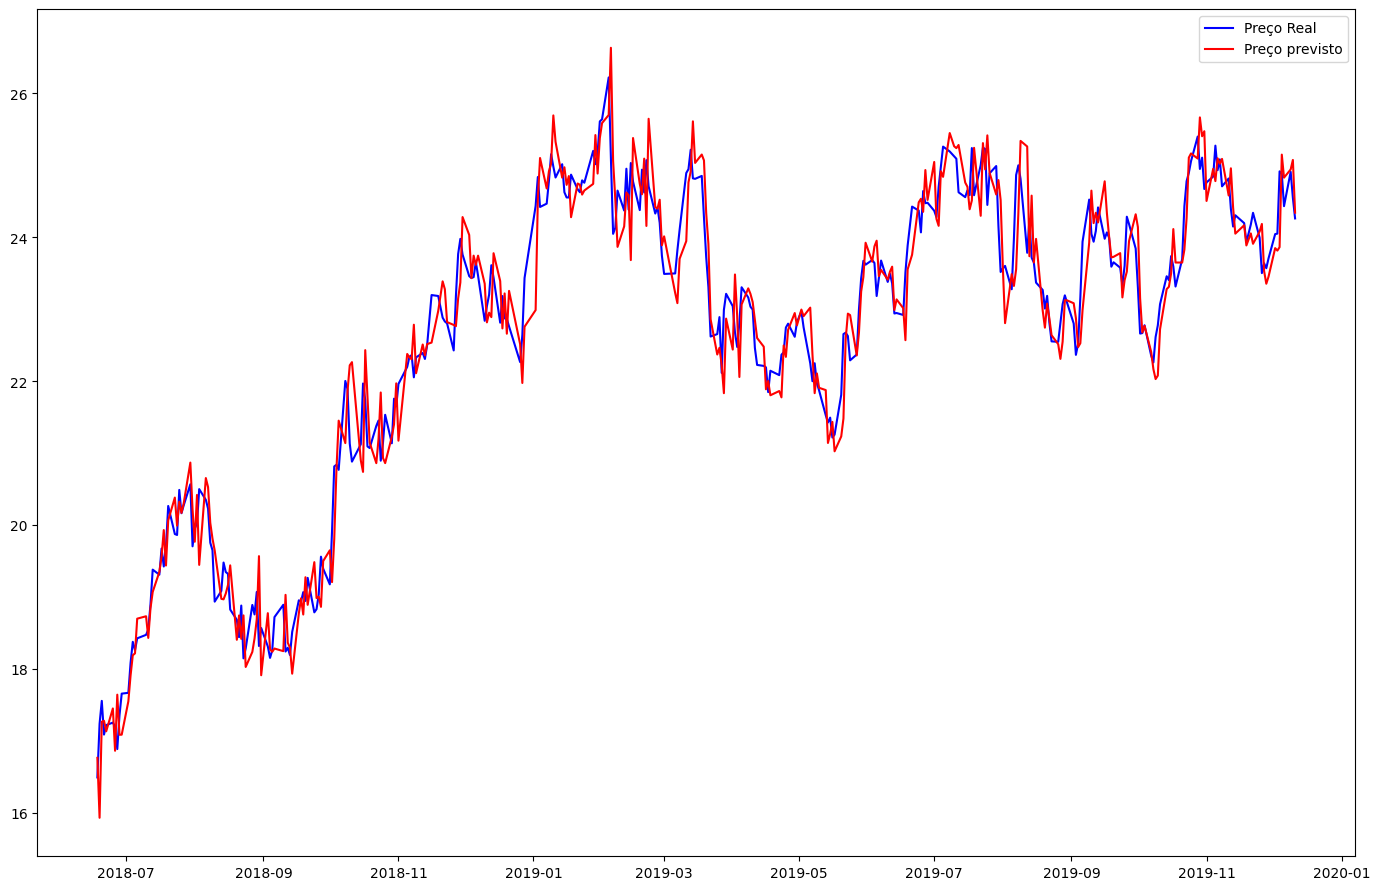

In [46]:
# plotando previsão contra dados reais
pyplot.plot(df2['Close'] , color = 'blue' , label = 'Preço Real')
pyplot.plot(df2['previsão'], color='red' ,  label = 'Preço previsto')
pyplot.legend()
pyplot.show()

In [47]:
cash = 100.0
min = 100.0
max = 100.0

close = 0
prev = 0

putcall = False
longshort = False

acertos = 0
erros = 0

lucroperda = 0

df3 = df2 #resultado


for x in range(len(df)):

    putcall = False
    longshort = False

    if( x+1 == len(df3)):
        break
    else:
        close = df3['Close'][x] #close
        prev = df3['previsão'][x+1]
        if(prev > close):
            putcall = True
        else:
            putcall = False

        lucroperda =  abs(df3['Close'][x] - df3['Close'][x+1])

        if(df3['Close'][x] < df3['Close'][x+1]):
            longshort = True
        else:
            longshort = False

        if(longshort != putcall):
            cash = cash - lucroperda
            erros = erros + 1
            if(cash < min):
                min = cash
        else:
            cash = cash + lucroperda
            acertos = acertos + 1
            if(cash > max):
                max = cash

print(cash)
print("Total:" , len(df3) , " Acertos: ", acertos , " Erros: " , erros , " MAX: " , max , " MIN: ", min )
print("Valorização Buy and Hold" , df3['Close'][0] , " --- " , df3['Close'].iloc[-1])

90.862045
Total: 369  Acertos:  176  Erros:  192  MAX:  105.54873  MIN:  89.97701
Valorização Buy and Hold 16.494623  ---  24.263407


/tmp/ipython-input-2408516394.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  close = df3['Close'][x] #close
/tmp/ipython-input-2408516394.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prev = df3['previsão'][x+1]
/tmp/ipython-input-2408516394.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lucroperda =  abs(df3['Close'][x] - df3['Close'][x+1])
/tmp/ipython-input-2408516394.py:39: FutureWarning: Series.__getitem__ tr

Salvar em arquivo CSV (opcional)

In [ ]:
# df2.to_csv('itau_ARIMA.csv')

In [ ]:
# FIM